# Compare classifiers across consensus profiles

Compare classifier metrics across different consensus profile strategies, stratefied by representations types.

In [9]:
import polars as pl 
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import MultiComparison

preds = pl.read_parquet("./compiled_results/compiled_metrics.parquet")

cpcnn = preds.filter(pl.col("Feat_type") == "cpcnn")
dino = preds.filter(pl.col("Feat_type") == "cpcnn")
cellprofiler = preds.filter(pl.col("Feat_type") == "cpcnn")

## CPCNN

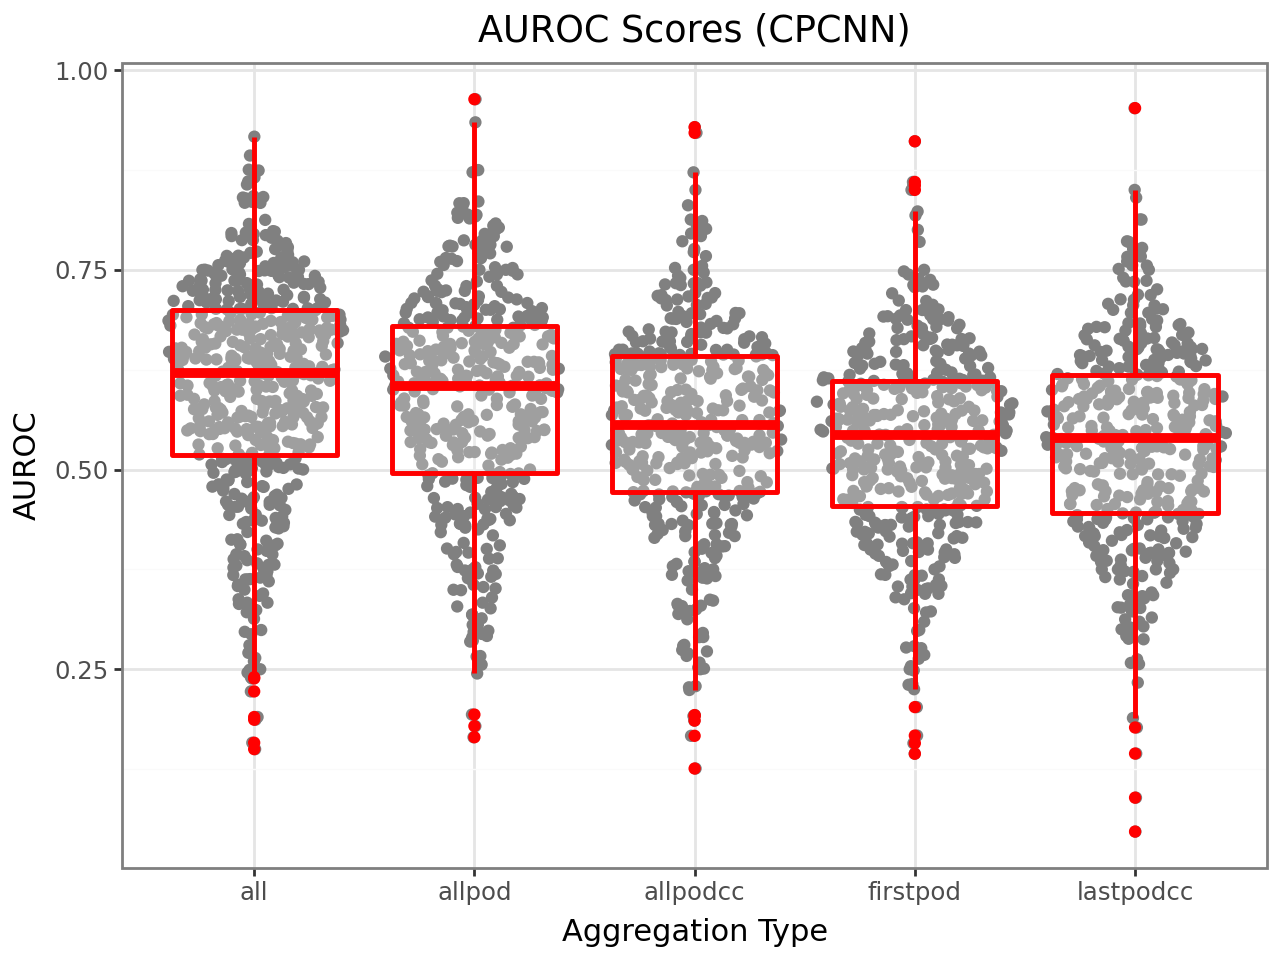

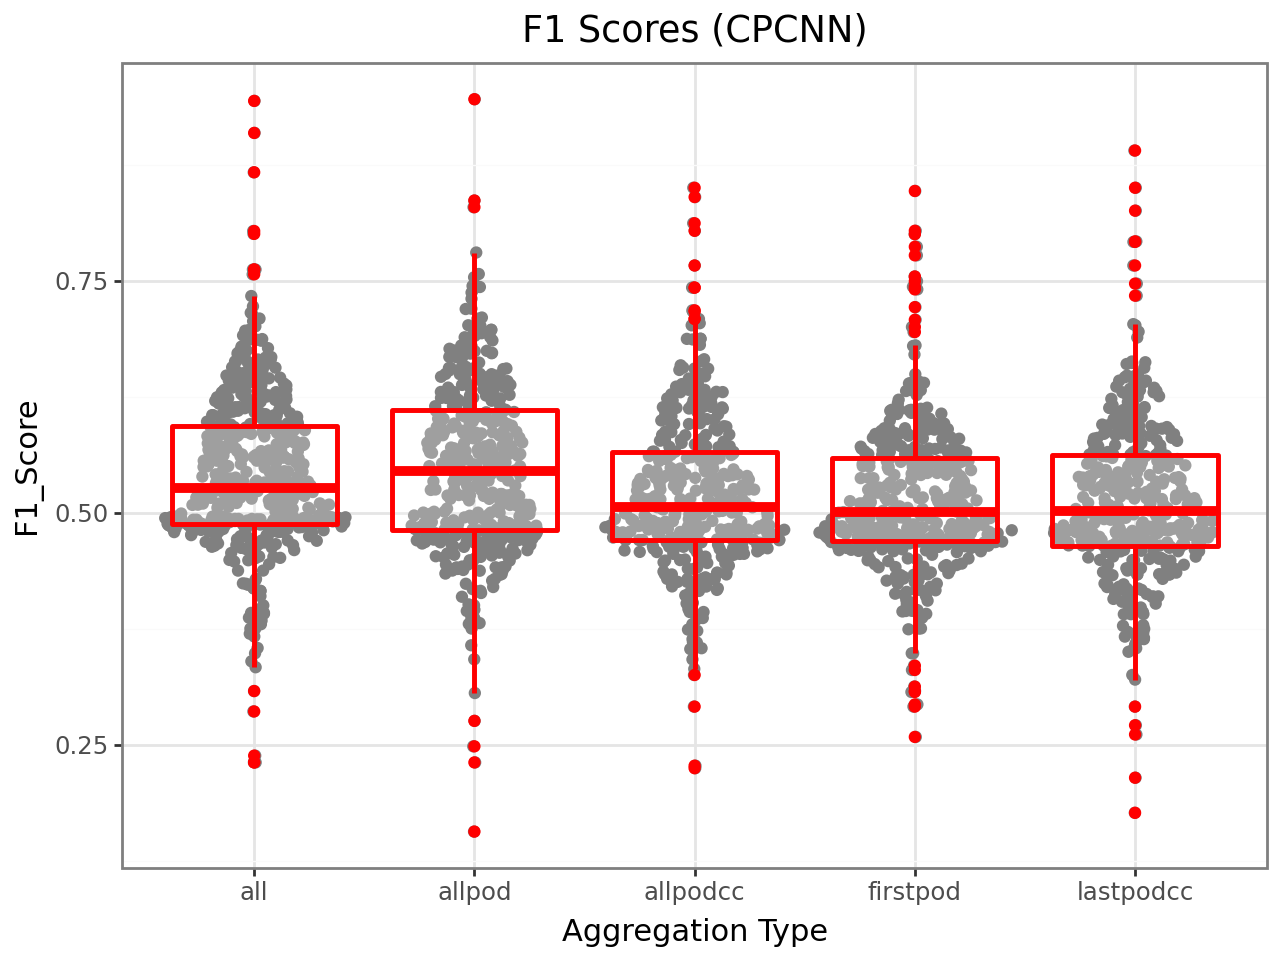

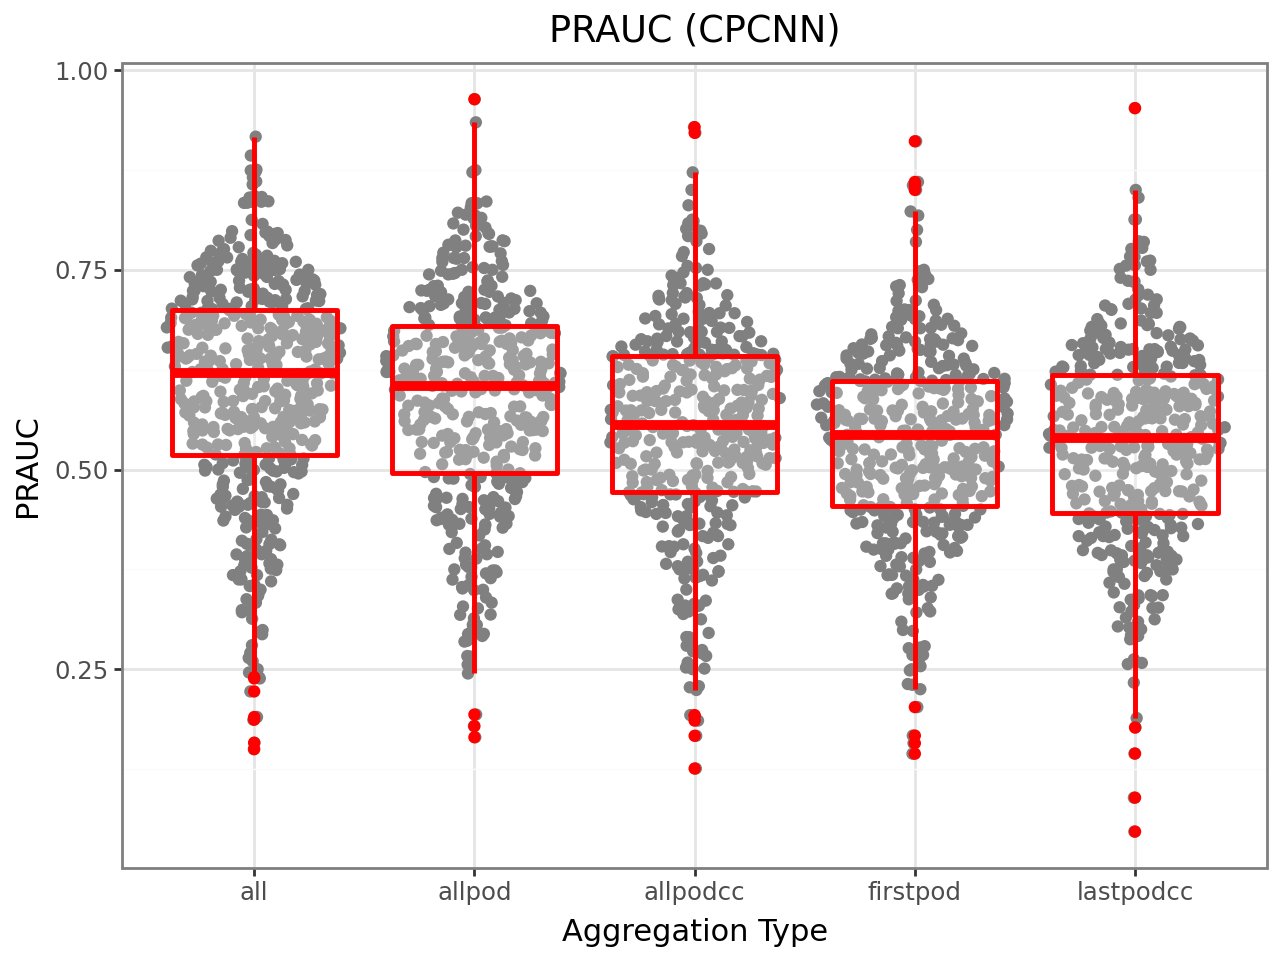

In [3]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(cpcnn, aes(x='Metadata_AggType', y='AUROC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='AUROC Scores (CPCNN)', x='Aggregation Type', y='AUROC') 
    + theme_bw()
)

plot.show()

plot = (
    ggplot(cpcnn, aes(x='Metadata_AggType', y='F1_Score')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='F1 Scores (CPCNN)', x='Aggregation Type', y='F1_Score') 
    + theme_bw()
)

plot.show()

plot = (
    ggplot(cpcnn, aes(x='Metadata_AggType', y='PRAUC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='PRAUC (CPCNN)', x='Aggregation Type', y='PRAUC') 
    + theme_bw()
)

plot.show()

## Dino

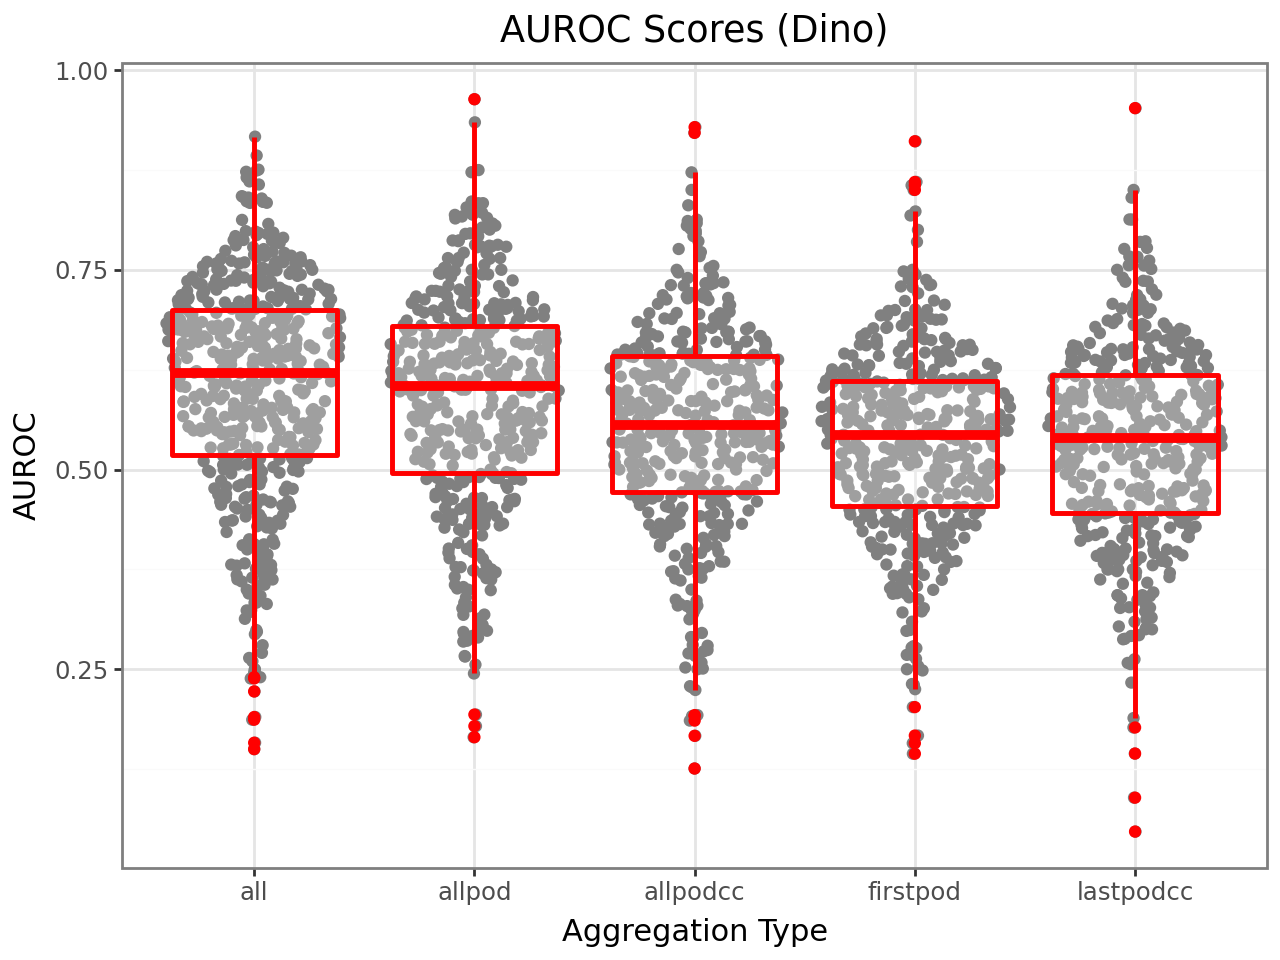

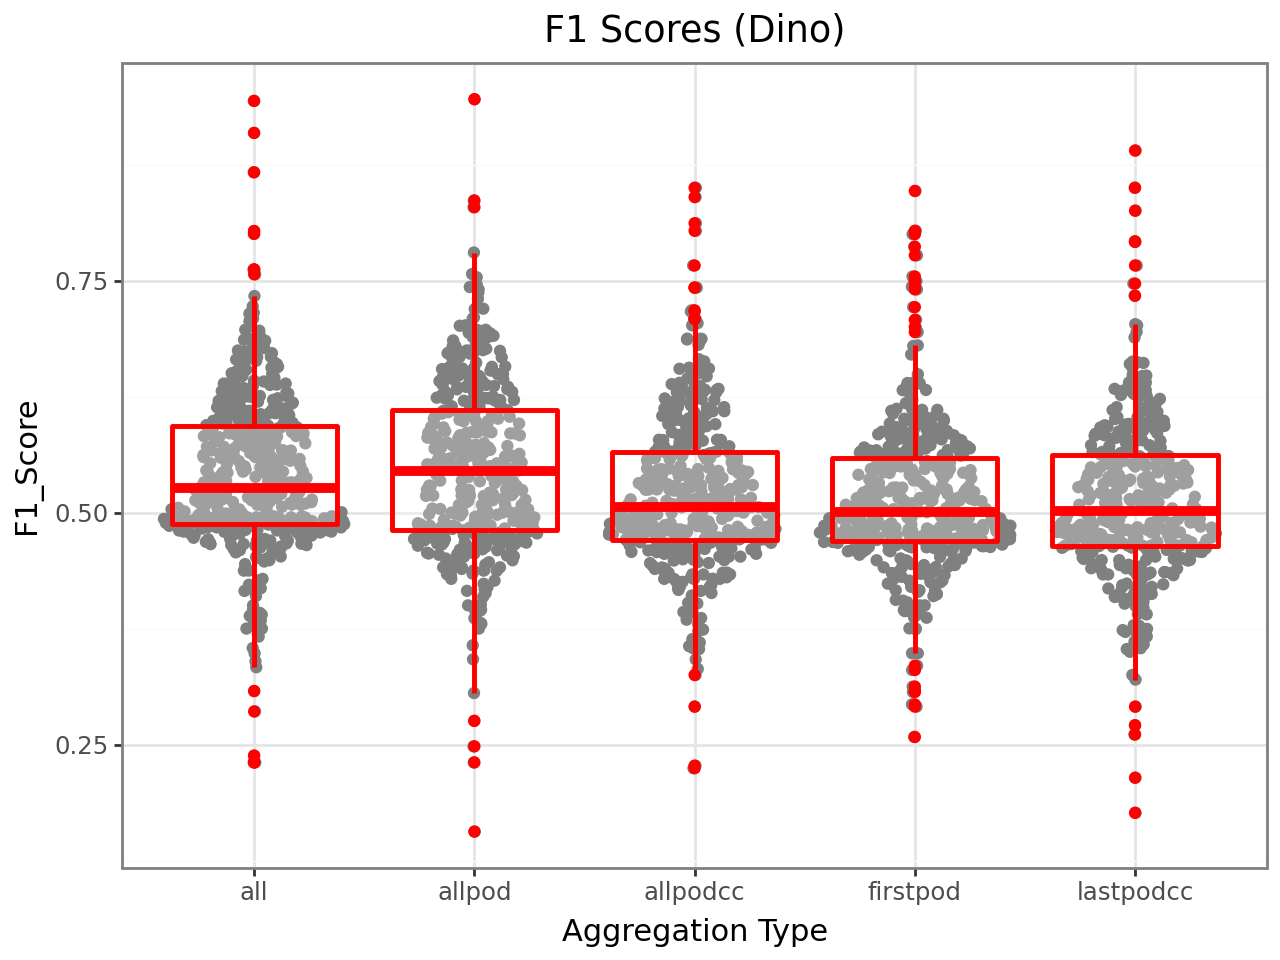

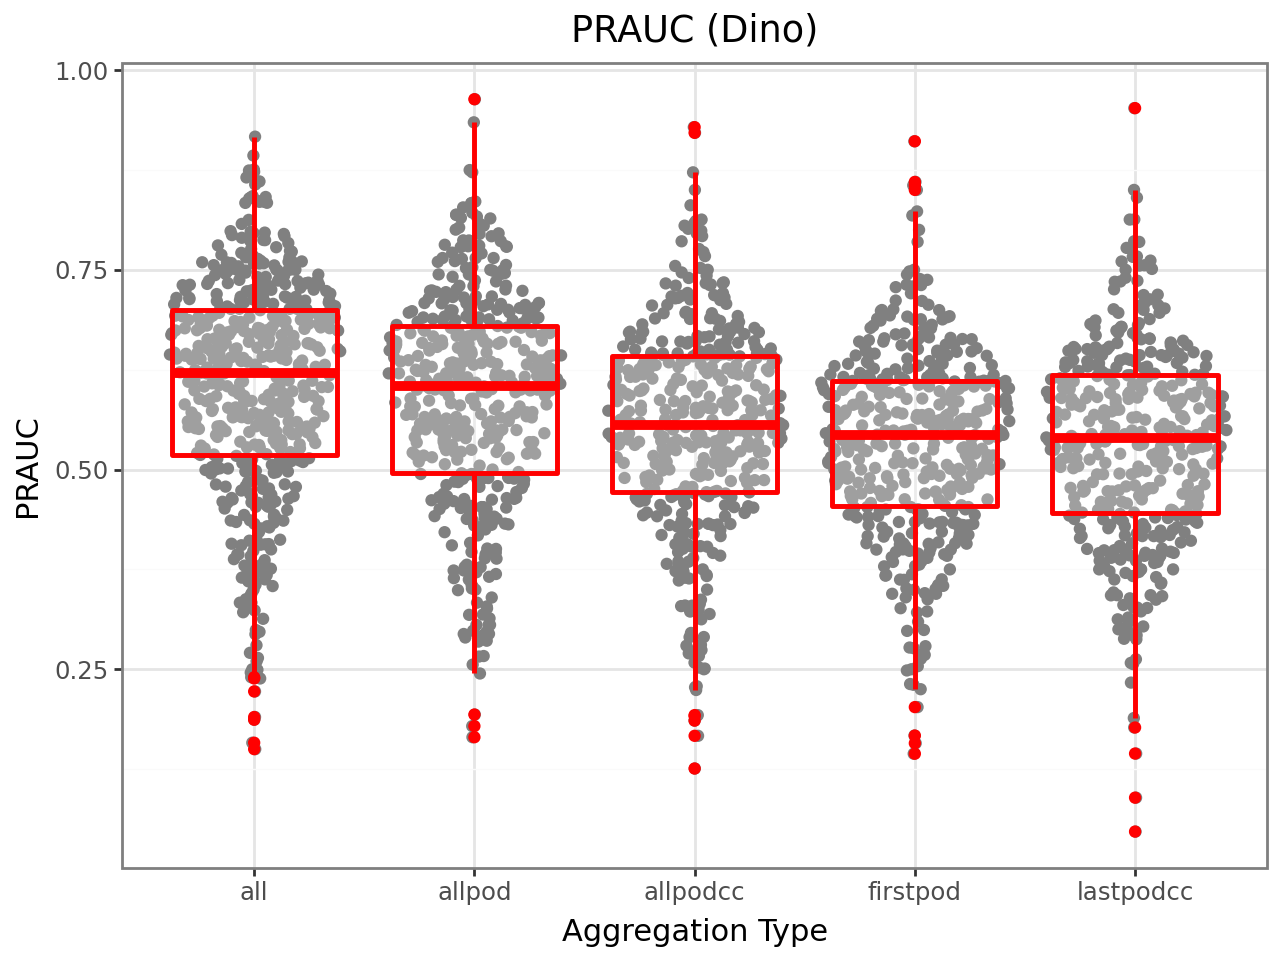

In [4]:
from plotnine import ggplot, aes, geom_boxplot, geom_sina, labs, theme_bw

plot = (
    ggplot(dino, aes(x='Metadata_AggType', y='AUROC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='AUROC Scores (Dino)', x='Aggregation Type', y='AUROC') 
    + theme_bw()
)
plot.show()

plot = (
    ggplot(dino, aes(x='Metadata_AggType', y='F1_Score')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='F1 Scores (Dino)', x='Aggregation Type', y='F1_Score') 
    + theme_bw()
)
plot.show()

plot = (
    ggplot(dino, aes(x='Metadata_AggType', y='PRAUC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='PRAUC (Dino)', x='Aggregation Type', y='PRAUC') 
    + theme_bw()
)
plot.show()

## CellProfiler

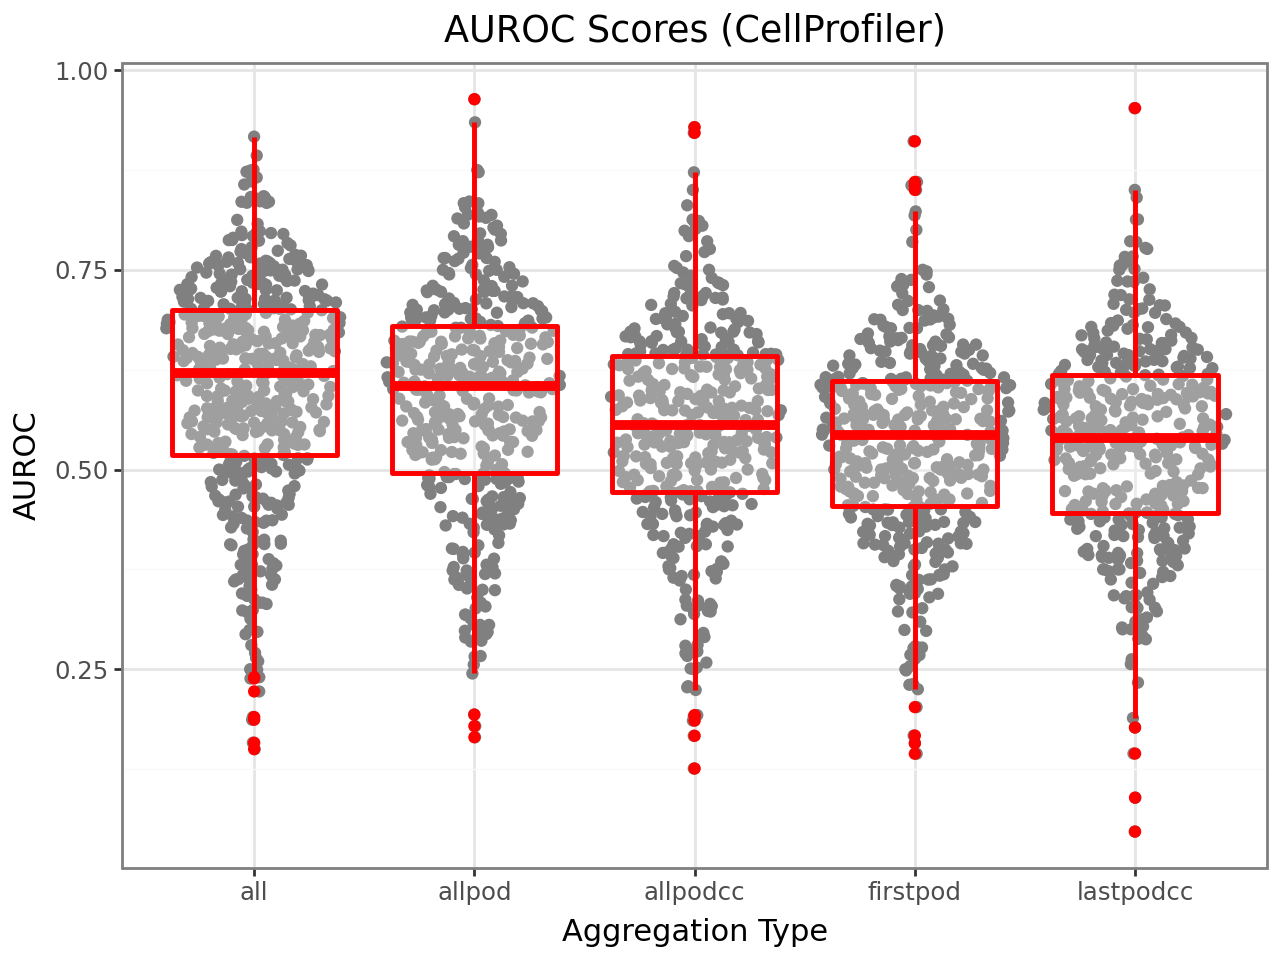

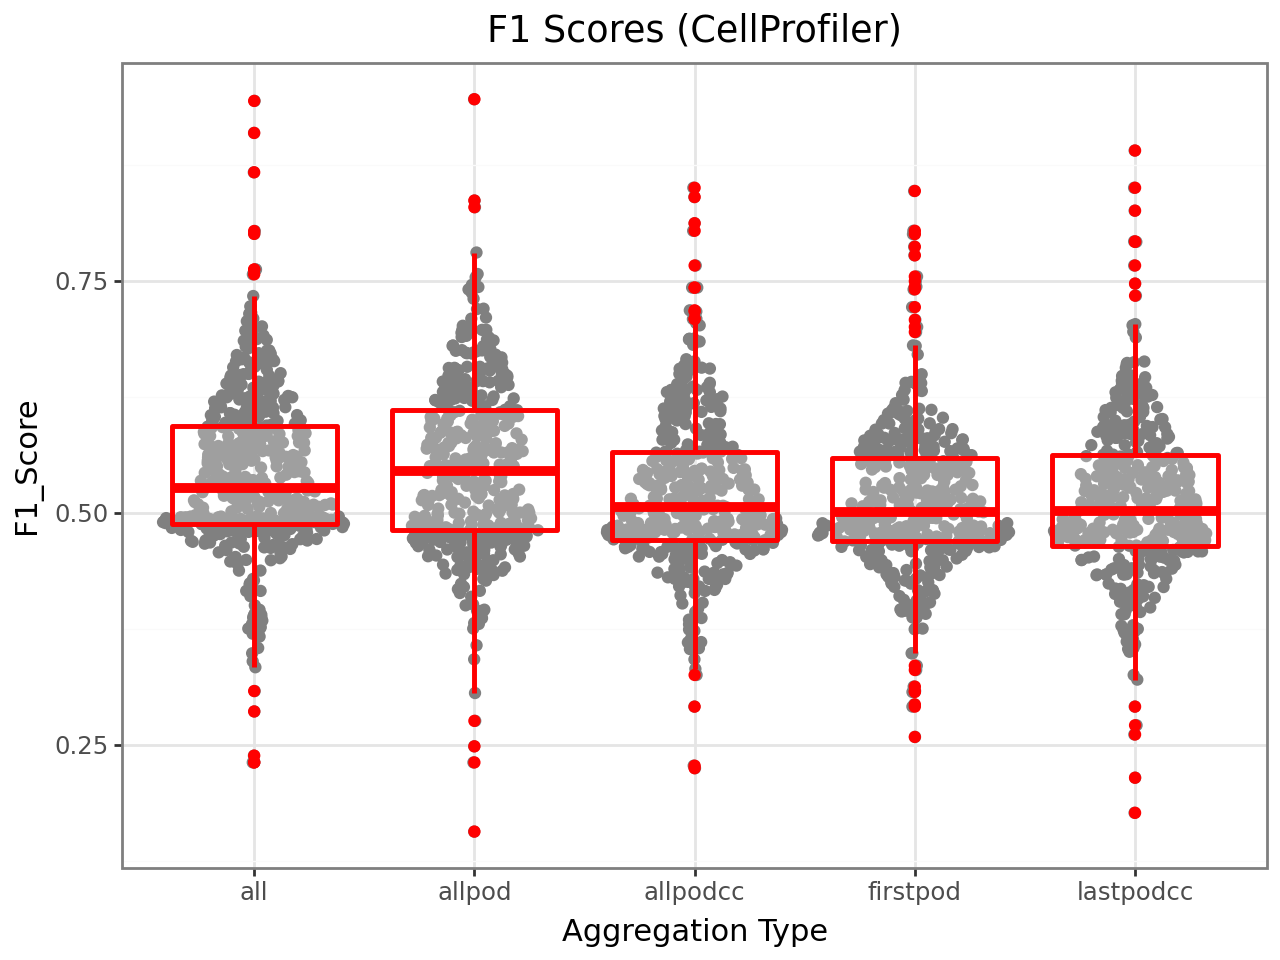

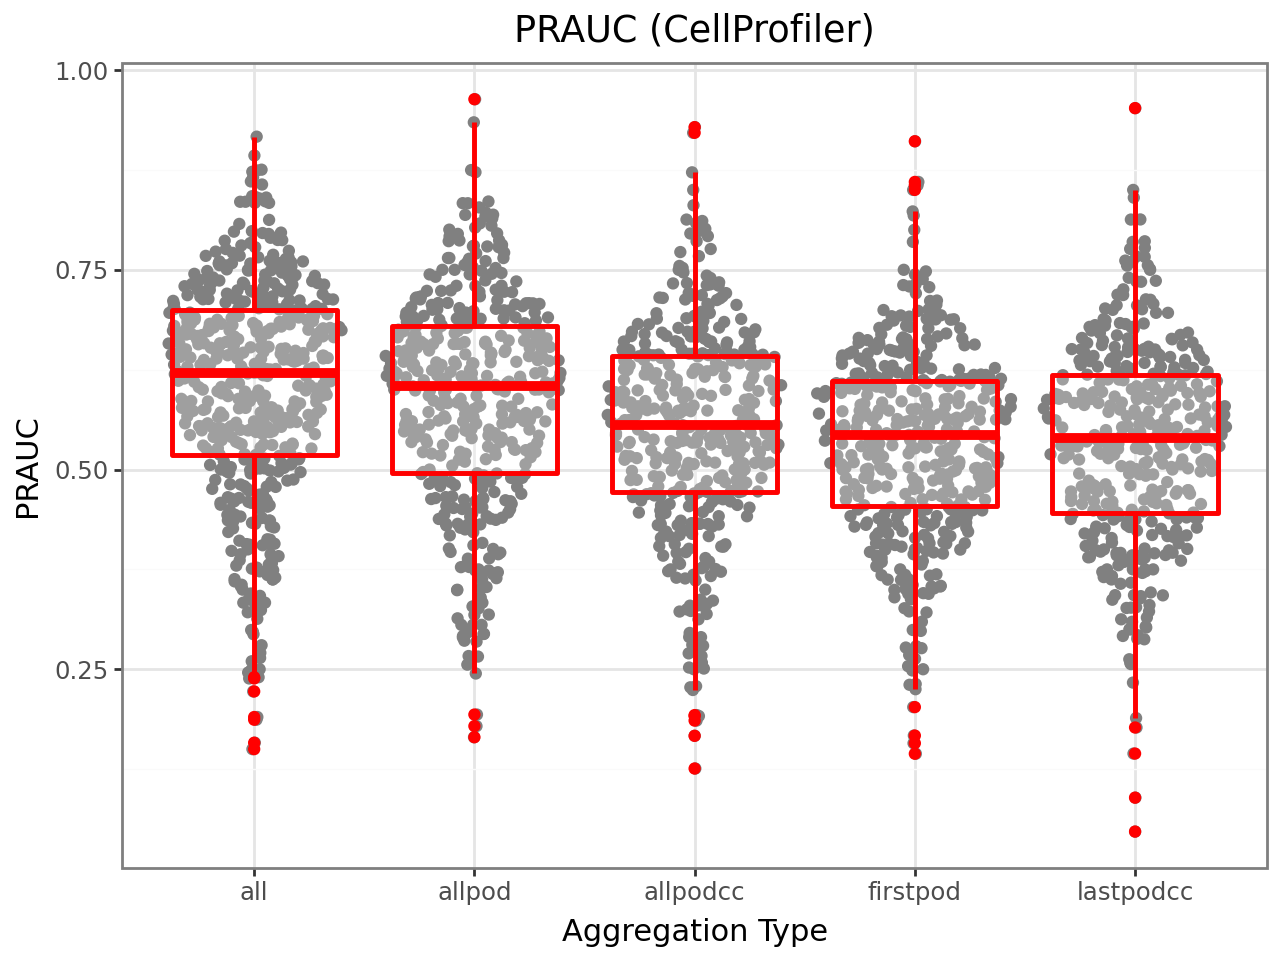

In [5]:
from plotnine import ggplot, aes, geom_boxplot, geom_sina, labs, theme_bw

plot = (
    ggplot(cellprofiler, aes(x='Metadata_AggType', y='AUROC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='AUROC Scores (CellProfiler)', x='Aggregation Type', y='AUROC') 
    + theme_bw()
)
plot.show()

plot = (
    ggplot(cellprofiler, aes(x='Metadata_AggType', y='F1_Score')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='F1 Scores (CellProfiler)', x='Aggregation Type', y='F1_Score') 
    + theme_bw()
)
plot.show()

plot = (
    ggplot(cellprofiler, aes(x='Metadata_AggType', y='PRAUC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='PRAUC (CellProfiler)', x='Aggregation Type', y='PRAUC') 
    + theme_bw()
)
plot.show()

## Compute statistics

In [14]:
df_pandas = preds.to_pandas()

model = smf.mixedlm("AUROC ~ Metadata_AggType", df_pandas, groups=df_pandas["Metadata_Label"],
                    re_formula="~Feat_type")
result = model.fit()
df_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(df_pandas["fitted_values"], df_pandas["Metadata_AggType"])
tukey_result = mc.tukeyhsd()


/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


In [15]:
tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
     all    allpod  -0.0121    0.0 -0.0189 -0.0053   True
     all  allpodcc  -0.0591    0.0 -0.0659 -0.0522   True
     all  firstpod  -0.0698    0.0 -0.0766  -0.063   True
     all lastpodcc  -0.0577    0.0 -0.0646 -0.0509   True
  allpod  allpodcc   -0.047    0.0 -0.0541 -0.0398   True
  allpod  firstpod  -0.0577    0.0 -0.0648 -0.0506   True
  allpod lastpodcc  -0.0456    0.0 -0.0528 -0.0385   True
allpodcc  firstpod  -0.0108 0.0004 -0.0179 -0.0036   True
allpodcc lastpodcc   0.0013 0.9869 -0.0059  0.0085  False
firstpod lastpodcc   0.0121    0.0   0.005  0.0192   True
---------------------------------------------------------
[1.22259647e-05 3.46567219e-12 3.46567219e-12 3.46567219e-12
 3.46567219e-12 3.46567219e-12 3.46567219e-12 3.76681728e-04
 9.86876507e-01 3.74739549e-05]
